# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly as py
import plotly.graph_objs as go
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=40000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (40000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data["project_is_approved"].value_counts()

1    33826
0     6174
Name: project_is_approved, dtype: int64

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
29891,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Grades 3-5,"Math & Science, History & Civics","Mathematics, Social Sciences",Breakout Box to Ignite Engagement!,It's the end of the school year. Routines have...,"My students desire challenges, movement, and c...",I will design different clues using specific c...,Donations to this project will immediately imp...,"My students need items from a \""Breakout Box\""...",6,1


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
29891,146723,p099708,c0a28c79fe8ad5810da49de47b3fb491,Mrs.,CA,2016-04-27 01:10:09,Grades 3-5,Breakout Box to Ignite Engagement!,It's the end of the school year. Routines have...,"My students desire challenges, movement, and c...",I will design different clues using specific c...,Donations to this project will immediately imp...,"My students need items from a \""Breakout Box\""...",6,1,Math_Science History_Civics,Mathematics SocialSciences,It's the end of the school year. Routines have...


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
#print(project_data['essay'].values[20000])
#print("="*50)
#print(project_data['essay'].values[99999])
#print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

I work in an inclusive, mainstream, kindergarten classroom.  I have 23 students about which half have never been to preschool.  These are great children ready to learn.\r\n\r\nI am happy to say that I work with the most enthusiastic, amazing group of children.  They come to school every day with smiles on their faces and excitement in their souls.\r\n\r\nBeing an inner city school many of these children lack the experiences that they need to be successful in the common core curriculum.  I want to change this!\r\n\r\nCurrently we have three boogie boards in my classroom and the children absolutely love them.  They use them as rewards for finishing their work, we use them as a small center, and we use them just for fun!  \r\n\r\nBoogie boards are great learning tools that make learning to write much more exciting.  Children are engaged and enthusiastic about writing when presented with a boogie board.\r\n\r\nBoogie boards are also a great incentive for children with behavioral issues or 

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I work in an inclusive, mainstream, kindergarten classroom.  I have 23 students about which half have never been to preschool.  These are great children ready to learn.    I am happy to say that I work with the most enthusiastic, amazing group of children.  They come to school every day with smiles on their faces and excitement in their souls.    Being an inner city school many of these children lack the experiences that they need to be successful in the common core curriculum.  I want to change this!    Currently we have three boogie boards in my classroom and the children absolutely love them.  They use them as rewards for finishing their work, we use them as a small center, and we use them just for fun!      Boogie boards are great learning tools that make learning to write much more exciting.  Children are engaged and enthusiastic about writing when presented with a boogie board.    Boogie boards are also a great incentive for children with behavioral issues or the SPED children wi

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I work in an inclusive mainstream kindergarten classroom I have 23 students about which half have never been to preschool These are great children ready to learn I am happy to say that I work with the most enthusiastic amazing group of children They come to school every day with smiles on their faces and excitement in their souls Being an inner city school many of these children lack the experiences that they need to be successful in the common core curriculum I want to change this Currently we have three boogie boards in my classroom and the children absolutely love them They use them as rewards for finishing their work we use them as a small center and we use them just for fun Boogie boards are great learning tools that make learning to write much more exciting Children are engaged and enthusiastic about writing when presented with a boogie board Boogie boards are also a great incentive for children with behavioral issues or the SPED children within the classroom They are truly a too

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 40000/40000 [01:06<00:00, 599.92it/s]


In [19]:
# after preprocesing
#creating a new column with the preprocessed essays and replacing it with the original columns
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
preprocessed_essays[20000]

'work inclusive mainstream kindergarten classroom 23 students half never preschool great children ready learn happy say work enthusiastic amazing group children come school every day smiles faces excitement souls inner city school many children lack experiences need successful common core curriculum want change currently three boogie boards classroom children absolutely love use rewards finishing work use small center use fun boogie boards great learning tools make learning write much exciting children engaged enthusiastic writing presented boogie board boogie boards also great incentive children behavioral issues sped children within classroom truly tool look forward adding classroom nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 40000/40000 [00:03<00:00, 12200.91it/s]


In [21]:
#creating a new column with the preprocessed titles,useful for analysis
project_data['preprocessed_titles'] = preprocessed_titles

In [22]:
#---------------------------------------------------------------------------------------
# Preprocessing Categorical Features: teacher_prefix
print(project_data['teacher_prefix'].value_counts())
print("="*100)

print(project_data[project_data['teacher_prefix'].isnull()]['teacher_prefix'])

print("="*100)
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')
print(project_data['teacher_prefix'].value_counts())

print("="*100)
#---------------------------------------------------------------------------------------

Mrs.       20907
Ms.        14384
Mr.         3851
Teacher      854
Dr.            2
Name: teacher_prefix, dtype: int64
30368    NaN
7820     NaN
Name: teacher_prefix, dtype: object
Mrs.       20909
Ms.        14384
Mr.         3851
Teacher      854
Dr.            2
Name: teacher_prefix, dtype: int64


In [23]:
#-------------------------------------------------------------------------------------------------------
# Preprocessing Categorical Features: project_grade_category
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-', '_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
#-------------------------------------------------------------------------------------------------------

# Splitting data into Train, cross validation and test: Stratified Sampling

In [24]:
from sklearn.model_selection import train_test_split
#How to split whole dataset into Train,CV and test
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
project_data_train, project_data_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])
project_data_train, project_data_cv, y_train, y_cv = train_test_split(project_data_train, y_train, test_size=0.33, stratify=y_train)
print(project_data_train.shape, project_data_cv.shape, y_train.shape, y_cv)

(17956, 16) (8844, 16) (17956,) 1687     1
28523    1
29396    1
2897     0
28457    0
35209    1
9960     0
28033    1
8957     1
26524    1
25548    1
24297    1
1161     1
28400    1
9992     1
29757    1
35527    1
20016    1
20385    1
18483    1
15289    1
27332    1
5929     1
26638    1
6420     1
3918     1
23396    1
36504    0
31715    1
17917    1
        ..
18333    1
24400    1
27605    1
5592     1
27844    1
29755    1
10483    0
35408    1
35158    1
18715    1
24491    1
15031    1
22896    1
12305    1
22177    1
10981    1
7959     1
11749    0
25720    0
33327    0
24076    0
10055    1
15700    0
33846    1
28044    1
39832    0
35439    1
1564     1
3915     1
6764     1
Name: project_is_approved, Length: 8844, dtype: int64


In [25]:
print("Split ratio")
print('-'*50)
print('Train dataset:',len(project_data_train)/len(project_data)*100,'%\n','size:',len(project_data_train))
print('Cross validation dataset:',len(project_data_cv)/len(project_data)*100,'%\n','size:',len(project_data_cv))
print('Test dataset:',len(project_data_test)/len(project_data)*100,'%\n','size:',len(project_data_test))

Split ratio
--------------------------------------------------
Train dataset: 44.89 %
 size: 17956
Cross validation dataset: 22.11 %
 size: 8844
Test dataset: 33.0 %
 size: 13200


In [26]:
#Features
project_data_train.drop(['project_is_approved'], axis=1, inplace=True)
project_data_cv.drop(['project_is_approved'], axis=1, inplace=True)
project_data_test.drop(['project_is_approved'], axis=1, inplace=True)

## 1.5 Preparing data for models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [28]:
def VectorizingData(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    transform_one_hot = vectorizer_feature.transform(project_data_transform[sFeature].values)
    #print(vectorizer_cat.get_feature_names())
    return(transform_one_hot)
    
def fnGetFeatures(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    return(vectorizer_feature.get_feature_names())

In [29]:
train_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_train)
cv_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_cv)
test_categories_one_hot = VectorizingData("clean_categories", project_data_train, project_data_test)

print("Shape of training data matrix after one hot encoding ",train_categories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_categories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_categories_one_hot.shape)

cat_features = fnGetFeatures("clean_categories", project_data_train, project_data_train)
print(cat_features)

Shape of training data matrix after one hot encoding  (17956, 9)
Shape of cross validation data matrix after one hot encoding  (8844, 9)
Shape of test data matrix after one hot encoding  (13200, 9)
['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']


In [30]:
train_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_train)
cv_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_cv)
test_subcategories_one_hot = VectorizingData('clean_subcategories', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_subcategories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_subcategories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_subcategories_one_hot.shape)

subCat_features = fnGetFeatures('clean_subcategories', project_data_train, project_data_train)
print(subCat_features)

Shape of train data matrix after one hot encoding  (17956, 30)
Shape of cross validation data matrix after one hot encoding  (8844, 30)
Shape of test data matrix after one hot encoding  (13200, 30)
['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']


In [31]:
train_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_train)
cv_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_cv)
test_school_state_category_one_hot = VectorizingData('school_state', project_data_train, project_data_test)


print("Shape of train data matrix after one hot encoding ",train_school_state_category_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_school_state_category_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_school_state_category_one_hot.shape)

schoolState_features = fnGetFeatures('school_state', project_data_train, project_data_train)
print(schoolState_features)

Shape of train data matrix after one hot encoding  (17956, 51)
Shape of cross validation data matrix after one hot encoding  (8844, 51)
Shape of test data matrix after one hot encoding  (13200, 51)
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [32]:
train_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_train)
cv_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_cv)
test_project_grade_category_one_hot = VectorizingData('project_grade_category', project_data_train, project_data_test)


print("Shape of train data matrix after one hot encoding ",train_project_grade_category_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_project_grade_category_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_project_grade_category_one_hot.shape)

projectGradeCat_features = fnGetFeatures('project_grade_category', project_data_train, project_data_train)
print(projectGradeCat_features)

Shape of train data matrix after one hot encoding  (17956, 4)
Shape of cross validation data matrix after one hot encoding  (8844, 4)
Shape of test data matrix after one hot encoding  (13200, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [33]:
train_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_train)
cv_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_cv)
test_teacher_prefix_categories_one_hot = VectorizingData('teacher_prefix', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_teacher_prefix_categories_one_hot.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_teacher_prefix_categories_one_hot.shape)
print("Shape of test data matrix after one hot encoding ",test_teacher_prefix_categories_one_hot.shape)

teacherPrefix_features = fnGetFeatures('teacher_prefix', project_data_train, project_data_train)
print(teacherPrefix_features)

Shape of train data matrix after one hot encoding  (17956, 5)
Shape of cross validation data matrix after one hot encoding  (8844, 5)
Shape of test data matrix after one hot encoding  (13200, 5)
['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [34]:
def VectorizingTextData(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True, min_df = 10, ngram_range=(1, 2),max_features = 5000)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    transform_one_hot = vectorizer_feature.transform(project_data_transform[sFeature].values)
    #print(vectorizer_cat.get_feature_names())
    return(transform_one_hot)

def fnGetTextFeatures(sFeature, project_data_fitting, project_data_transform):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer_feature = CountVectorizer(lowercase=False, binary=True, min_df = 10, ngram_range=(1, 2),max_features = 5000)
    vectorizer_feature.fit(project_data_fitting[sFeature].values) #fitting has to be on Train data
    return(vectorizer_feature.get_feature_names())

In [35]:
train_essay_bow = VectorizingTextData('preprocessed_essays', project_data_train, project_data_train)
cv_essay_bow = VectorizingTextData('preprocessed_essays', project_data_train, project_data_cv)
test_essay_bow = VectorizingTextData('preprocessed_essays', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_essay_bow.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_essay_bow.shape)
print("Shape of test data matrix after one hot encoding ",test_essay_bow.shape)

essay_features = fnGetTextFeatures('preprocessed_essays', project_data_train, project_data_train)
print(essay_features)

Shape of train data matrix after one hot encoding  (17956, 5000)
Shape of cross validation data matrix after one hot encoding  (8844, 5000)
Shape of test data matrix after one hot encoding  (13200, 5000)
['000', '10', '100', '100 free', '100 percent', '100 students', '11', '12', '12th', '13', '14', '15', '16', '17', '18', '19', '1st', '1st grade', '20', '20 students', '200', '2016', '2017', '21', '21st', '21st century', '22', '23', '24', '25', '25 students', '26', '28', '2nd', '2nd grade', '2nd graders', '30', '30 minutes', '30 students', '32', '35', '3d', '3d printer', '3rd', '3rd grade', '3rd graders', '40', '400', '45', '4th', '4th 5th', '4th grade', '4th graders', '50', '50 students', '500', '500 students', '5th', '5th grade', '5th graders', '60', '60 minutes', '60 students', '600', '65', '6th', '6th grade', '6th graders', '70', '70 students', '75', '75 students', '7th', '7th 8th', '7th grade', '80', '80 students', '85', '8th', '8th grade', '8th graders', '90', '90 students', '95',

In [36]:
train_title_bow = VectorizingTextData('preprocessed_titles', project_data_train, project_data_train)
cv_title_bow = VectorizingTextData('preprocessed_titles', project_data_train, project_data_cv)
test_title_bow = VectorizingTextData('preprocessed_titles', project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_title_bow.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_title_bow.shape)
print("Shape of test data matrix after one hot encoding ",test_title_bow.shape)

title_features = fnGetTextFeatures('preprocessed_titles', project_data_train, project_data_train)
print(title_features)

Shape of train data matrix after one hot encoding  (17956, 1514)
Shape of cross validation data matrix after one hot encoding  (8844, 1514)
Shape of test data matrix after one hot encoding  (13200, 1514)
['05', '16', '1st', '1st grade', '1st graders', '2016', '2017', '21st', '21st century', '2nd', '2nd grade', '2nd graders', '3d', '3d printer', '3d printing', '3rd', '3rd grade', '3rd graders', '4th', '4th grade', '4th graders', '5th', '5th grade', '5th graders', '6th', '6th grade', 'abc', 'about', 'about it', 'about our', 'academic', 'access', 'accessible', 'achieve', 'achievement', 'action', 'active', 'active bodies', 'active learners', 'active learning', 'active minds', 'active seating', 'active students', 'activities', 'activity', 'add', 'adding', 'adventure', 'adventures', 'after', 'again', 'age', 'ahead', 'air', 'algebra', 'alive', 'all', 'all about', 'all day', 'all learners', 'all students', 'along', 'alouds', 'alphabet', 'alternative', 'alternative seating', 'amazing', 'america

#### 1.5.2.2 tfidf

In [37]:
def tfidf_Vectorizer(sFeature, project_data_fitting,project_data_transform):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer_tfidf_feature = TfidfVectorizer(min_df=10, ngram_range=(1, 2),max_features = 5000)
    vectorizer_tfidf_feature.fit(project_data_train[sFeature])      #Fitting has to be on Train data

    tfidf_vect = vectorizer_tfidf_feature.transform(project_data_transform[sFeature].values)
    return(tfidf_vect)

In [38]:
train_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_train)
cv_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_cv)
test_essay_tfidf = tfidf_Vectorizer('preprocessed_essays',  project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_essay_tfidf.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_essay_tfidf.shape)
print("Shape of test data matrix after one hot encoding ",test_essay_tfidf.shape)

Shape of train data matrix after one hot encoding  (17956, 5000)
Shape of cross validation data matrix after one hot encoding  (8844, 5000)
Shape of test data matrix after one hot encoding  (13200, 5000)


In [39]:
train_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_train)
cv_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_cv)
test_title_tfidf = tfidf_Vectorizer('preprocessed_titles',  project_data_train, project_data_test)

print("Shape of train data matrix after one hot encoding ",train_title_tfidf.shape)
print("Shape of cross validation data matrix after one hot encoding ",cv_title_tfidf.shape)
print("Shape of test data matrix after one hot encoding ",test_title_tfidf.shape)

Shape of train data matrix after one hot encoding  (17956, 1514)
Shape of cross validation data matrix after one hot encoding  (8844, 1514)
Shape of test data matrix after one hot encoding  (13200, 1514)


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [40]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [41]:

# average Word2Vec
# compute average word2vec for each review.
train_No_ofWords_essays=[];
train_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_essays.append(vector)
    train_No_ofWords_essays.append(len(sentence.split()))
    
print(len(train_avg_w2v_essays))
print(len(train_avg_w2v_essays[0]))

100%|██████████| 17956/17956 [00:13<00:00, 1299.52it/s]

17956
300


In [42]:
len(train_No_ofWords_essays)

17956

In [43]:
# average Word2Vec
# compute average word2vec for each review.
cv_avg_w2v_essays = []; 
cv_No_ofWords_essays=[];# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_essays.append(vector)
    cv_No_ofWords_essays.append(len(sentence.split()))

print(len(cv_avg_w2v_essays))
print(len(cv_avg_w2v_essays[0]))
print(len(cv_No_ofWords_essays))

100%|██████████| 8844/8844 [00:06<00:00, 1319.39it/s]

8844
300
8844


In [44]:
# compute average word2vec for each review.
test_No_ofWords_essays=[];
test_avg_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_essays.append(vector)
    test_No_ofWords_essays.append(len(sentence.split()))

print(len(test_avg_w2v_essays))
print(len(test_avg_w2v_essays[0]))
print(len(test_No_ofWords_essays))

100%|██████████| 13200/13200 [00:09<00:00, 1326.97it/s]

13200
300
13200


In [45]:
# average Word2Vec
# compute average word2vec for each review.
train_No_ofWords_titles=[];
train_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_titles.append(vector)
    train_No_ofWords_titles.append(len(sentence.split()))
                                   
print(len(train_avg_w2v_titles))
print(len(train_avg_w2v_titles[0]))
print(len(train_No_ofWords_titles))

100%|██████████| 17956/17956 [00:00<00:00, 26245.06it/s]

17956
300
17956


In [46]:
# average Word2Vec
# compute average word2vec for each review.
cv_No_ofWords_titles=[];
cv_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    cv_avg_w2v_titles.append(vector)
    cv_No_ofWords_titles.append(len(sentence.split()))

print(len(cv_avg_w2v_titles))
print(len(cv_avg_w2v_titles[0]))
print(len(cv_No_ofWords_titles))

100%|██████████| 8844/8844 [00:00<00:00, 18899.73it/s]

8844
300
8844


In [47]:
# average Word2Vec
# compute average word2vec for each review.
test_No_ofWords_titles=[];
test_avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_titles.append(vector)
    test_No_ofWords_titles.append(len(sentence.split()))

print(len(test_avg_w2v_titles))
print(len(test_avg_w2v_titles[0]))
print(len(test_No_ofWords_titles))

100%|██████████| 13200/13200 [00:00<00:00, 18425.57it/s]

13200
300
13200


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [48]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [49]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_titles.append(vector)

print(len(train_tfidf_w2v_titles))
print(len(train_tfidf_w2v_titles[0]))

100%|██████████| 17956/17956 [00:01<00:00, 11180.96it/s]

17956
300


In [50]:
# average Word2Vec
# compute average word2vec for each review.
cv_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_titles.append(vector)

print(len(cv_tfidf_w2v_titles))
print(len(cv_tfidf_w2v_titles[0]))

100%|██████████| 8844/8844 [00:00<00:00, 16764.44it/s]

8844
300


In [51]:
# compute average word2vec for each review.
test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_titles.append(vector)

print(len(test_tfidf_w2v_titles))
print(len(test_tfidf_w2v_titles[0]))

100%|██████████| 13200/13200 [00:01<00:00, 13122.59it/s]

13200
300


In [52]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(project_data_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [53]:
# average Word2Vec
# compute average word2vec for each review.
train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_essays.append(vector)

print(len(train_tfidf_w2v_essays))
print(len(train_tfidf_w2v_essays[0]))

100%|██████████| 17956/17956 [01:45<00:00, 170.71it/s]

17956
300


In [54]:
# average Word2Vec
# compute average word2vec for each review.
cv_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    cv_tfidf_w2v_essays.append(vector)

print(len(cv_tfidf_w2v_essays))
print(len(cv_tfidf_w2v_essays[0]))

100%|██████████| 8844/8844 [00:45<00:00, 194.40it/s]

8844
300


In [55]:
# compute average word2vec for each review.
test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

print(len(test_tfidf_w2v_essays))
print(len(test_tfidf_w2v_essays[0]))

100%|██████████| 13200/13200 [01:02<00:00, 212.01it/s]

13200
300


### 1.5.3 Vectorizing Numerical features

In [56]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

project_data_train = pd.merge(project_data_train, price_data, on='id', how='left')
project_data_cv = pd.merge(project_data_cv, price_data, on='id', how='left')
project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')

In [57]:
from sklearn.preprocessing import Normalizer
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer = Normalizer()
normalizer.fit(project_data_train['price'].values.reshape(-1,1)) 


price_normalized_train = normalizer.transform(project_data_train['price'].values.reshape(-1, 1))
price_normalized_cv = normalizer.transform(project_data_cv['price'].values.reshape(-1, 1))
price_normalized_test = normalizer.transform(project_data_test['price'].values.reshape(-1, 1))


print('After normalization')
print(price_normalized_train.shape)
print(price_normalized_cv.shape)
print(price_normalized_test.shape)

After normalization
(17956, 1)
(8844, 1)
(13200, 1)


In [58]:
normalizer = Normalizer()
normalizer.fit(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 


# Now standardize the data with above maen and variance.
previously_posted_projects_normalized_train = normalizer.transform(project_data_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
previously_posted_projects_normalized_cv = normalizer.transform(project_data_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
previously_posted_projects_normalized_test = normalizer.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


print('After normalization')
print(previously_posted_projects_normalized_train.shape)
print(previously_posted_projects_normalized_cv.shape)
print(previously_posted_projects_normalized_test.shape)

After normalization
(17956, 1)
(8844, 1)
(13200, 1)


# Assignment 5: Logistic Regression

<ol>
    <li><strong>[Task-1] Logistic Regression(either SGDClassifier with log loss, or LogisticRegression) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best hyper parameters corresponding the algorithm that you choose)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

## <li><font color='red'>Set 1</font>: Categorical, numerical features + project_title(BOW) + preprocessed_eassay (`BOW with bi-grams` with `min_df=10` and `max_features=5000`)</li>

In [256]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_essay_bow, train_title_bow, train_school_state_category_one_hot,train_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_train, train_project_grade_category_one_hot, price_normalized_train)).tocsr()
X_cv = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_essay_bow, cv_title_bow, cv_school_state_category_one_hot, cv_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_cv, cv_project_grade_category_one_hot, price_normalized_cv)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_essay_bow, test_title_bow, test_school_state_category_one_hot, test_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_test, test_project_grade_category_one_hot, price_normalized_test)).tocsr()

print("Final Data matrix")
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

Final Data matrix
(17956, 6615) (17956,)
(8844, 6615) (8844,)
(13200, 6615) (13200,)


###  Using GridSearchCV

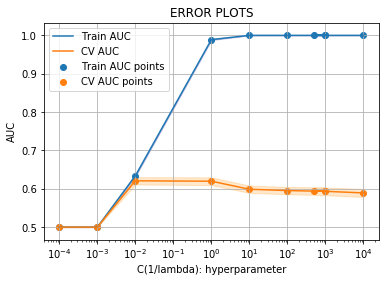

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l1',class_weight='balanced')

parameters = {'C':[10**-4, 10**-3,10**-2,1,10,100,1000,500,1000,10000]}

clf_l1 = GridSearchCV(lr, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf_l1.fit(X_train, y_train)

train_auc= clf_l1.cv_results_['mean_train_score']
train_auc_std= clf_l1.cv_results_['std_train_score']
cv_auc = clf_l1.cv_results_['mean_test_score'] 
cv_auc_std= clf_l1.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [267]:
#Output of GridSearchCV
print('Best score: ',clf_l1.best_score_)
print('alpha value with best score(penalty = l1): ',clf_l1.best_params_)
print('='*75)
print('Train AUC scores')
print(clf_l1.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf_l1.cv_results_['mean_test_score'])

Best score:  0.6207139714910336
alpha value with best score(penalty = l1):  {'C': 0.01}
Train AUC scores
[0.5        0.5        0.63388894 0.98897782 0.99999998 1.
 1.         1.         1.         1.        ]
CV AUC scores
[0.5        0.5        0.62071397 0.61970536 0.59875561 0.59532603
 0.59331532 0.59399886 0.59333601 0.58916076]


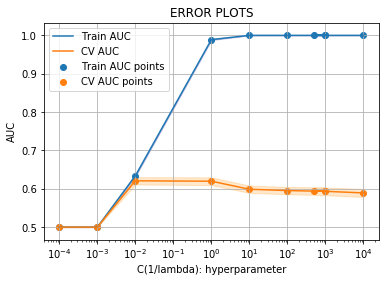

In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2',class_weight='balanced')

parameters = {'C':[10**-4, 10**-3,10**-2,1,10,100,1000,500,1000,10000]}

clf_l2 = GridSearchCV(lr, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf_l2.fit(X_train, y_train)

train_auc= clf_l1.cv_results_['mean_train_score']
train_auc_std= clf_l1.cv_results_['std_train_score']
cv_auc = clf_l1.cv_results_['mean_test_score'] 
cv_auc_std= clf_l1.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [269]:
#Output of GridSearchCV
print('Best score: ',clf_l2.best_score_)
print('alpha value with best score(penalty = l2): ',clf_l2.best_params_)
print('='*75)
print('Train AUC scores')
print(clf_l2.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf_l2.cv_results_['mean_test_score'])

Best score:  0.6718379328004225
alpha value with best score(penalty = l2):  {'C': 0.001}
Train AUC scores
[0.71778526 0.77974214 0.88949917 0.99457469 0.99999132 1.
 1.         1.         1.         1.        ]
CV AUC scores
[0.65539174 0.67183793 0.66980114 0.61389036 0.59971629 0.59604038
 0.59467386 0.59496619 0.59467386 0.59391942]


L2 norms is giving max AUC.

In [261]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

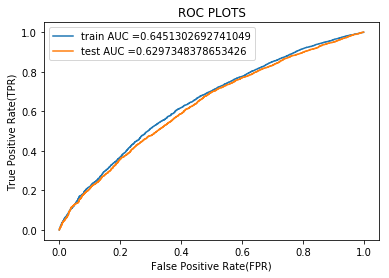

In [270]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty = 'l1',C = clf_l1.best_params_['C'], class_weight='balanced')
lr.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  batch_predict(lr, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(lr, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

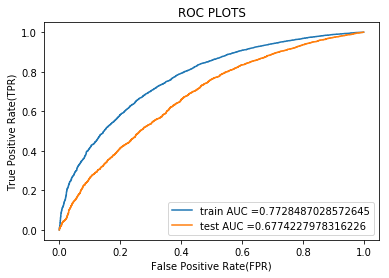

In [271]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


lr = LogisticRegression(penalty = 'l2',C = clf_l2.best_params_['C'], class_weight='balanced')
lr.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  batch_predict(lr, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(lr, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

### Confusion Matrix of Train and Test Data

In [67]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [68]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4925221753132712 for threshold 0.503
Train confusion matrix
[[ 1957   815]
 [ 4607 10577]]
Test confusion matrix
[[1211  826]
 [3729 7434]]


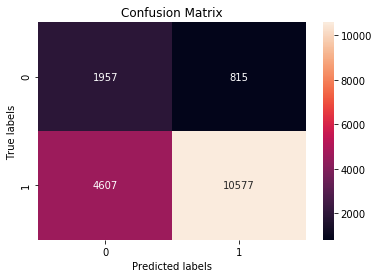

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

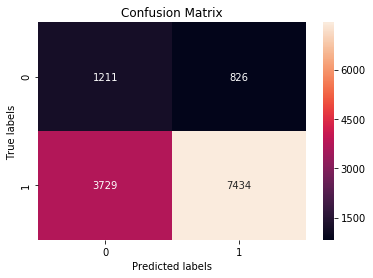

In [70]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## <li><font color='red'>Set 2</font>: Categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (`TFIDF with bi-grams` with `min_df=10` and `max_features=5000`)</li>

In [71]:
# Please write all the code with proper documentation

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_essay_tfidf, train_title_tfidf, train_school_state_category_one_hot,train_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_train, train_project_grade_category_one_hot, price_normalized_train)).tocsr()
X_cv = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_essay_tfidf, cv_title_tfidf, cv_school_state_category_one_hot, cv_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_cv, cv_project_grade_category_one_hot, price_normalized_cv)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_essay_tfidf, test_title_tfidf, test_school_state_category_one_hot, test_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_test, test_project_grade_category_one_hot, price_normalized_test)).tocsr()

print("Final Data matrix")
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

Final Data matrix
(17956, 6615) (17956,)
(8844, 6615) (8844,)
(13200, 6615) (13200,)


#### penalty = l1

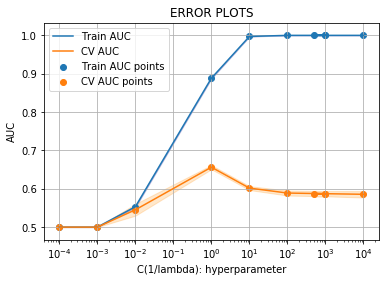

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l1',class_weight='balanced')

parameters = {'C':[10**-4, 10**-3,10**-2,1,10,100,1000,500,1000,10000]}

clf_l1 = GridSearchCV(lr, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf_l1.fit(X_train, y_train)

train_auc= clf_l1.cv_results_['mean_train_score']
train_auc_std= clf_l1.cv_results_['std_train_score']
cv_auc = clf_l1.cv_results_['mean_test_score'] 
cv_auc_std= clf_l1.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [73]:
#Output of GridSearchCV
print('Best score: ',clf_l1.best_score_)
print('alpha value with best score(penalty = l1): ',clf_l1.best_params_)
print('='*75)
print('Train AUC scores')
print(clf_l1.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf_l1.cv_results_['mean_test_score'])

Best score:  0.656238718033259
alpha value with best score(penalty = l1):  {'C': 1}
Train AUC scores
[0.5        0.5        0.55311718 0.88841274 0.99712916 1.
 1.         1.         1.         1.        ]
CV AUC scores
[0.5        0.5        0.5451446  0.65623872 0.60176673 0.58883565
 0.58713051 0.5875393  0.58716835 0.58556951]


#### penalty = l2

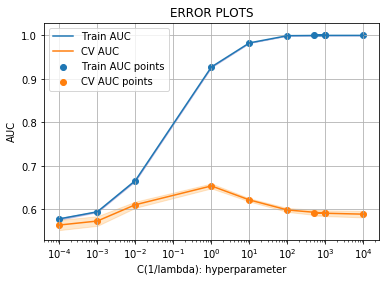

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2',class_weight='balanced')

parameters = {'C':[10**-4, 10**-3,10**-2,1,10,100,1000,500,1000,10000]}

clf_l2 = GridSearchCV(lr, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf_l2.fit(X_train, y_train)

train_auc= clf_l2.cv_results_['mean_train_score']
train_auc_std= clf_l2.cv_results_['std_train_score']
cv_auc = clf_l2.cv_results_['mean_test_score'] 
cv_auc_std= clf_l2.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [75]:
#Output of GridSearchCV
print('Best score: ',clf_l2.best_score_)
print('alpha value with best score(penalty = l2): ',clf_l2.best_params_)
print('='*75)
print('Train AUC scores')
print(clf_l2.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf_l2.cv_results_['mean_test_score'])

Best score:  0.6540976570699589
alpha value with best score(penalty = l2):  {'C': 1}
Train AUC scores
[0.57844865 0.59476846 0.66649154 0.92746723 0.98279054 0.99934301
 1.         0.99999863 1.         1.        ]
CV AUC scores
[0.56427067 0.57346432 0.61094457 0.65409766 0.62197018 0.59891085
 0.59134321 0.59257292 0.59134321 0.58928533]


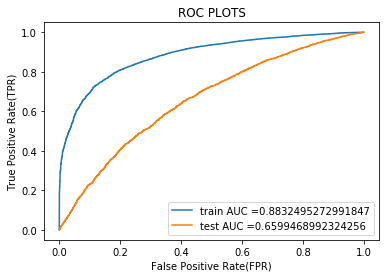

In [76]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


lr2 = LogisticRegression(penalty = 'l1',C = clf_l1.best_params_['C'], class_weight='balanced')
lr2.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  batch_predict(lr2, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(lr2, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

### Confusion Matrix of Train and Test Data

In [77]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [78]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6513200222532415 for threshold 0.682
Train confusion matrix
[[2679   93]
 [7497 7687]]
Test confusion matrix
[[1543  494]
 [6018 5145]]


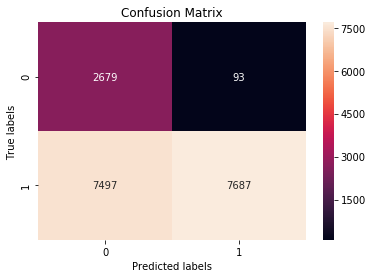

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

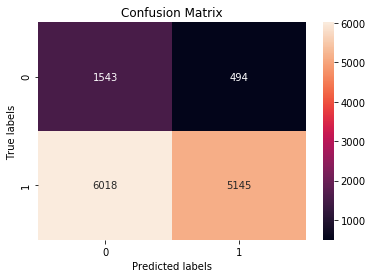

In [80]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>      

In [81]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_avg_w2v_essays, train_avg_w2v_titles, train_school_state_category_one_hot,train_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_train, train_project_grade_category_one_hot, price_normalized_train)).tocsr()
X_cv = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_avg_w2v_essays, cv_avg_w2v_titles, cv_school_state_category_one_hot, cv_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_cv, cv_project_grade_category_one_hot, price_normalized_cv)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_avg_w2v_essays, test_avg_w2v_titles, test_school_state_category_one_hot, test_teacher_prefix_categories_one_hot, previously_posted_projects_normalized_test, test_project_grade_category_one_hot, price_normalized_test)).tocsr()

print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(17956, 701)
(8844, 701)
(13200, 701)


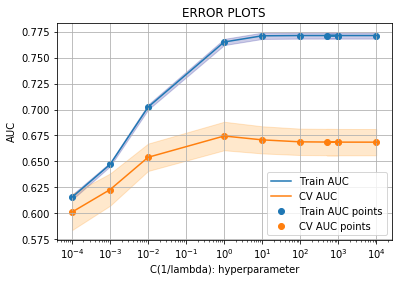

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2',class_weight='balanced')

parameters = {'C':[10**-4, 10**-3,10**-2,1,10,100,1000,500,1000,10000]}

clf_l2 = GridSearchCV(lr, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf_l2.fit(X_train, y_train)

train_auc= clf_l2.cv_results_['mean_train_score']
train_auc_std= clf_l2.cv_results_['std_train_score']
cv_auc = clf_l2.cv_results_['mean_test_score'] 
cv_auc_std= clf_l2.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [83]:
#Output of GridSearchCV
print('Best score: ',clf_l2.best_score_)
print('alpha value with best score(penalty = l2): ',clf_l2.best_params_)
print('='*75)
print('Train AUC scores')
print(clf_l2.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf_l2.cv_results_['mean_test_score'])

Best score:  0.6744201695350622
alpha value with best score(penalty = l2):  {'C': 1}
Train AUC scores
[0.61533237 0.64699901 0.7023538  0.76517072 0.7711488  0.77140663
 0.77139715 0.77139787 0.77139715 0.77139336]
CV AUC scores
[0.60100835 0.62267144 0.65387965 0.67442017 0.67070793 0.66879228
 0.66851146 0.66854804 0.66851146 0.66848437]


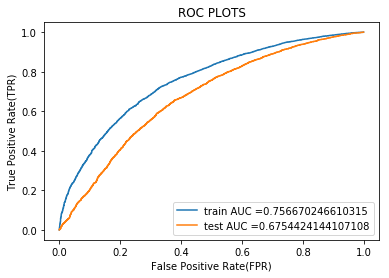

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


lr2 = LogisticRegression(penalty = 'l1',C = clf_l2.best_params_['C'], class_weight='balanced',solver='liblinear')
lr2.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  batch_predict(lr2, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(lr2, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()


In [86]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4812995223954129 for threshold 0.487
Train confusion matrix
[[ 1895   877]
 [ 4529 10655]]
Test confusion matrix
[[1191  846]
 [3536 7627]]


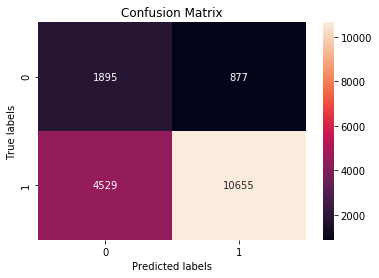

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

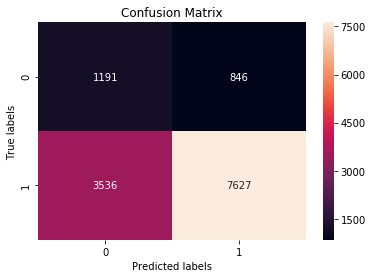

In [88]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>

In [89]:
X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_school_state_category_one_hot, train_project_grade_category_one_hot, train_teacher_prefix_categories_one_hot, price_normalized_train ,  previously_posted_projects_normalized_train, train_tfidf_w2v_essays, train_tfidf_w2v_titles)).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_school_state_category_one_hot, test_project_grade_category_one_hot, test_teacher_prefix_categories_one_hot, price_normalized_test,  previously_posted_projects_normalized_test, test_tfidf_w2v_essays, test_tfidf_w2v_titles)).tocsr()
X_cv = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_school_state_category_one_hot, cv_project_grade_category_one_hot, cv_teacher_prefix_categories_one_hot, price_normalized_cv,previously_posted_projects_normalized_cv,  cv_tfidf_w2v_essays, cv_tfidf_w2v_titles)).tocsr()

print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(17956, 701)
(8844, 701)
(13200, 701)


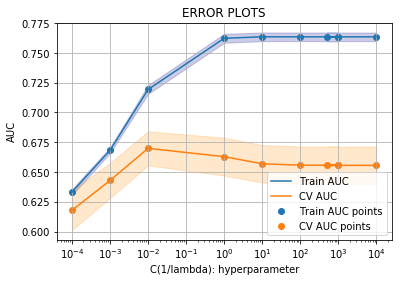

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2',class_weight='balanced')

parameters = {'C':[10**-4, 10**-3,10**-2,1,10,100,1000,500,1000,10000]}

clf_l2 = GridSearchCV(lr, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf_l2.fit(X_train, y_train)

train_auc= clf_l2.cv_results_['mean_train_score']
train_auc_std= clf_l2.cv_results_['std_train_score']
cv_auc = clf_l2.cv_results_['mean_test_score'] 
cv_auc_std= clf_l2.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [91]:
#Output of GridSearchCV
print('Best score: ',clf_l2.best_score_)
print('alpha value with best score(penalty = l2): ',clf_l2.best_params_)
print('='*75)
print('Train AUC scores')
print(clf_l2.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf_l2.cv_results_['mean_test_score'])

Best score:  0.6698815250125646
alpha value with best score(penalty = l2):  {'C': 0.01}
Train AUC scores
[0.63325065 0.66831301 0.71930856 0.76226673 0.76354293 0.76351037
 0.76350025 0.76350143 0.76350025 0.76349895]
CV AUC scores
[0.61790423 0.64293629 0.66988153 0.66290609 0.65692616 0.65574158
 0.65560604 0.65562279 0.65560604 0.65559297]


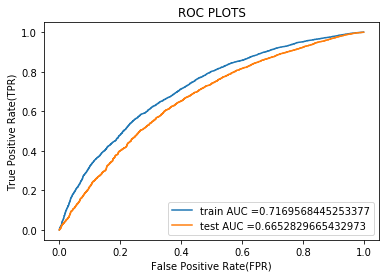

In [93]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


lr2 = LogisticRegression(penalty = 'l2',C = clf_l2.best_params_['C'], class_weight='balanced')
lr2.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  batch_predict(lr2, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(lr2, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

In [94]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.4337319833895177 for threshold 0.477
Train confusion matrix
[[ 1679  1093]
 [ 4460 10724]]
Test confusion matrix
[[1131  906]
 [3399 7764]]


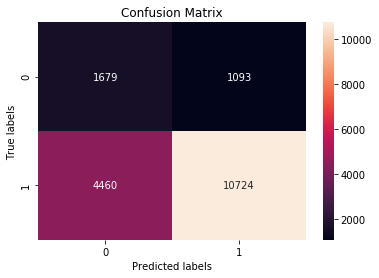

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

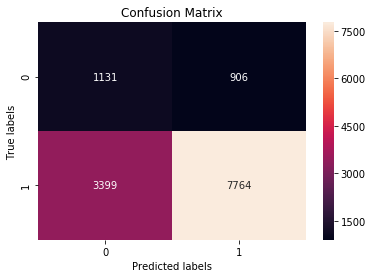

In [96]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## <li><strong>[Task-2] Apply Logistic Regression on the below feature set <font color='red'> Set 5 </font> by finding the best hyper parameter as suggested in step 2 and step 3.</strong>

<li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
            </ul>
        And apply the Logistic regression on these features by finding the best hyper paramter as suggested in step 2 and step 3 <br>
    </li>

#### Sentiment score's of each of the essay

In [234]:
#https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzerimport nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []
    for sentence in sentences:
        sentiment = analyzer.polarity_scores(sentence)# calculate the sentiment
        sentiments.append( [sentiment['neg'], sentiment['pos'],sentiment['neu'], sentiment['compound']])# list of lists
        df = pd.DataFrame(sentiments)
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1
    return df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [235]:
sentimentScoreEssays_train = sentimentScore(project_data_train['preprocessed_essays'])
sentimentScoreEssays_cv = sentimentScore(project_data_cv['preprocessed_essays'])
sentimentScoreEssays_test = sentimentScore(project_data_test['preprocessed_essays'])

print(sentimentScoreEssays_train.shape)
print(sentimentScoreEssays_cv.shape)
print(sentimentScoreEssays_test.shape)

(17956, 10)
(8844, 10)
(13200, 10)


In [240]:
#for train
pos=list(sentimentScoreEssays_train['pos'])
pos_train=np.array(pos)
neg=list(sentimentScoreEssays_train['neg'])
neg_train=np.array(neg)
com=list(sentimentScoreEssays_train['compound'])
com_train=np.array(com)


#for cv
pos=list(sentimentScoreEssays_cv['pos'])
pos_cv=np.array(pos)
neg=list(sentimentScoreEssays_cv['neg'])
neg_cv=np.array(neg)
com=list(sentimentScoreEssays_cv['compound'])
com_cv=np.array(com)


#for test
pos=list(sentimentScoreEssays_test['pos'])
pos_test=np.array(pos)
neg=list(sentimentScoreEssays_test['neg'])
neg_test=np.array(neg)
com=list(sentimentScoreEssays_test['compound'])
com_test=np.array(com)

In [241]:
train_No_ofWords_essays=np.array(train_No_ofWords_essays)
train_No_ofWords_titles=np.array(train_No_ofWords_titles)
cv_No_ofWords_essays=np.array(cv_No_ofWords_essays)
cv_No_ofWords_titles=np.array(cv_No_ofWords_titles)
test_No_ofWords_essays=np.array(test_No_ofWords_essays)
test_No_ofWords_titles=np.array(test_No_ofWords_titles)

train_No_ofWords_essays = normalizer.transform(train_No_ofWords_essays.reshape(-1, 1))
train_No_ofWords_titles = normalizer.transform(train_No_ofWords_titles.reshape(-1, 1))


cv_No_ofWords_essays = normalizer.transform(cv_No_ofWords_essays.reshape(-1, 1))
cv_No_ofWords_titles = normalizer.transform(cv_No_ofWords_titles.reshape(-1, 1))

test_No_ofWords_essays = normalizer.transform(test_No_ofWords_essays.reshape(-1, 1))
test_No_ofWords_titles = normalizer.transform(test_No_ofWords_titles.reshape(-1, 1))

X_train = hstack((train_categories_one_hot, train_subcategories_one_hot, train_school_state_category_one_hot, train_project_grade_category_one_hot, train_teacher_prefix_categories_one_hot, price_normalized_train ,  previously_posted_projects_normalized_train,train_No_ofWords_essays, train_No_ofWords_titles,pos_train.reshape(-1,1),neg_train.reshape(-1,1),com_train.reshape(-1,1))).tocsr()
X_test = hstack((test_categories_one_hot, test_subcategories_one_hot, test_school_state_category_one_hot, test_project_grade_category_one_hot, test_teacher_prefix_categories_one_hot, price_normalized_test,  previously_posted_projects_normalized_test,test_No_ofWords_essays, test_No_ofWords_titles,pos_test.reshape(-1,1),neg_test.reshape(-1,1),com_test.reshape(-1,1))).tocsr()
X_cv = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_school_state_category_one_hot, cv_project_grade_category_one_hot, cv_teacher_prefix_categories_one_hot, price_normalized_cv,previously_posted_projects_normalized_cv,cv_No_ofWords_essays, cv_No_ofWords_titles,pos_cv.reshape(-1,1),neg_cv.reshape(-1,1),com_cv.reshape(-1,1))).tocsr()

print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)



(17956, 106)
(8844, 106)
(13200, 106)


#### penalty = l1

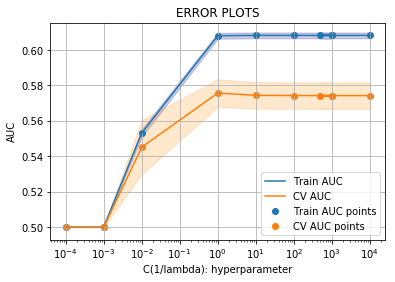

In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l1',class_weight='balanced')

parameters = {'C':[10**-4, 10**-3,10**-2,1,10,100,1000,500,1000,10000]}

clf_l1 = GridSearchCV(lr, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf_l1.fit(X_train, y_train)

train_auc= clf_l1.cv_results_['mean_train_score']
train_auc_std= clf_l1.cv_results_['std_train_score']
cv_auc = clf_l1.cv_results_['mean_test_score'] 
cv_auc_std= clf_l1.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [243]:
#Output of GridSearchCV
print('Best score: ',clf_l1.best_score_)
print('alpha value with best score(penalty = l1): ',clf_l1.best_params_)
print('='*75)
print('Train AUC scores')
print(clf_l1.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf_l1.cv_results_['mean_test_score'])

Best score:  0.5756997491504333
alpha value with best score(penalty = l1):  {'C': 1}
Train AUC scores
[0.5        0.5        0.55311718 0.60804505 0.60824717 0.60823491
 0.6082327  0.60823275 0.60823247 0.60823272]
CV AUC scores
[0.5        0.5        0.5451446  0.57569975 0.57441693 0.57426986
 0.57425952 0.57425904 0.57425584 0.57425536]


#### penalty = l2

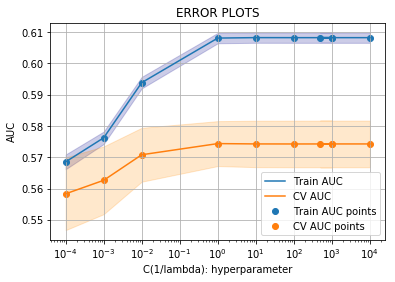

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2',class_weight='balanced')

parameters = {'C':[10**-4, 10**-3,10**-2,1,10,100,1000,500,1000,10000]}

clf_l2 = GridSearchCV(lr, parameters, cv= 5, scoring='roc_auc',return_train_score=True)

clf_l2.fit(X_train, y_train)

train_auc= clf_l2.cv_results_['mean_train_score']
train_auc_std= clf_l2.cv_results_['std_train_score']
cv_auc = clf_l2.cv_results_['mean_test_score'] 
cv_auc_std= clf_l2.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [245]:
#Output of GridSearchCV
print('Best score: ',clf_l2.best_score_)
print('alpha value with best score(penalty = l2): ',clf_l2.best_params_)
print('='*75)
print('Train AUC scores')
print(clf_l2.cv_results_['mean_train_score'])
print('CV AUC scores')
print(clf_l2.cv_results_['mean_test_score'])

Best score:  0.5743657114535463
alpha value with best score(penalty = l2):  {'C': 1}
Train AUC scores
[0.56852618 0.57622063 0.59385143 0.60810045 0.60824316 0.60823359
 0.60823259 0.60823188 0.60823259 0.60823298]
CV AUC scores
[0.55831808 0.56263022 0.57079899 0.57436571 0.57425929 0.57424599
 0.57425489 0.57425335 0.57425489 0.57425358]


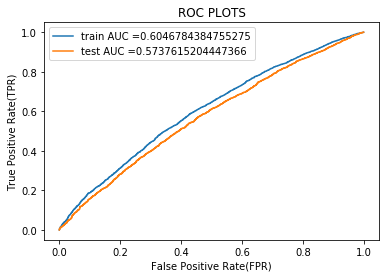

In [249]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


lr2 = LogisticRegression(penalty = 'l1',C = clf_l1.best_params_['C'], class_weight='balanced')
lr2.fit(X_train ,y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  batch_predict(lr2, X_train)#Return probability estimates for the  set1x ,for the class label 1 or +ve.
y_test_pred =  batch_predict(lr2, X_test)#Return probability estimates for the setcvx,for the class label 1 or +ve .

train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC PLOTS")
plt.show()

In [250]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.33551738881362164 for threshold 0.469
Train confusion matrix
[[ 1189  1583]
 [ 4422 10762]]
Test confusion matrix
[[ 807 1230]
 [3407 7756]]


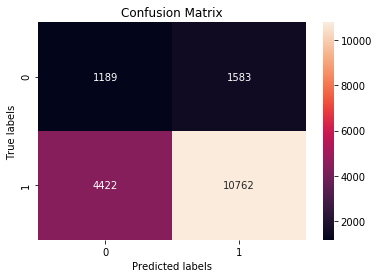

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt   

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

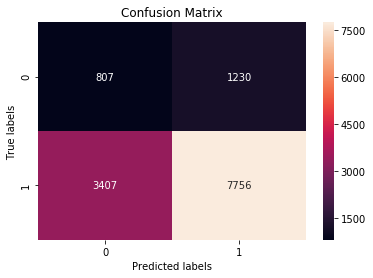

In [252]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## Conclusion

In [273]:
from prettytable import PrettyTable
pt=PrettyTable(['Vectorizer','Model','Hyperparameter(Alpha)','Penality','Train AUC','Test AUC'])
pt.add_row(['BoW','LogisticRegression',0.001,'l2',0.7728487,0.6774227])
pt.add_row(['Tfidf','LogisticRegression',1,'l1',0.8832495,0.6599468])
pt.add_row(['Avg W2V','LogisticRegression',1,'l1',0.7566702,0.6754424])
pt.add_row(['Tfidf W2V','LogisticRegression',0.01,'l2',0.7169568,0.6652829])
pt.add_row(['Set-5','LogisticRegression',1,'l1',0.6046784,0.5737615])
print(pt)

+------------+--------------------+-----------------------+----------+-----------+-----------+
| Vectorizer |       Model        | Hyperparameter(Alpha) | Penality | Train AUC |  Test AUC |
+------------+--------------------+-----------------------+----------+-----------+-----------+
|    BoW     | LogisticRegression |         0.001         |    l2    | 0.7728487 | 0.6774227 |
|   Tfidf    | LogisticRegression |           1           |    l1    | 0.8832495 | 0.6599468 |
|  Avg W2V   | LogisticRegression |           1           |    l1    | 0.7566702 | 0.6754424 |
| Tfidf W2V  | LogisticRegression |          0.01         |    l2    | 0.7169568 | 0.6652829 |
|   Set-5    | LogisticRegression |           1           |    l1    | 0.6046784 | 0.5737615 |
+------------+--------------------+-----------------------+----------+-----------+-----------+
